In [42]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


In [43]:
import nltk


In [4]:
nltk.download_shell()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

  Identifier> stopwords


        C:\Users\HP\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [44]:
messages= [line.rstrip() for line in open('SMSSpamCollection')]

In [45]:
messages[34]

'spam\tThanks for your subscription to Ringtone UK your mobile will be charged Â£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged'

In [46]:
for mess_no,message in enumerate(messages[:10]):
    print(message,mess_no)
    print('/n')
    

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 0
/n
ham	Ok lar... Joking wif u oni... 1
/n
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 2
/n
ham	U dun say so early hor... U c already then say... 3
/n
ham	Nah I don't think he goes to usf, he lives around here though 4
/n
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 5
/n
ham	Even my brother is not like to speak with me. They treat me like aids patent. 6
/n
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 7
/n
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Cla

In [47]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [48]:
messages.head(50)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [49]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [50]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [51]:
messages['length']=messages['message'].apply(len)

In [52]:
messages.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


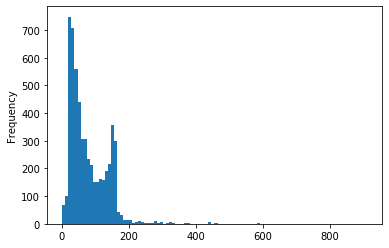

In [53]:
messages['length'].plot.hist(bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC01EDDDD8>,
      dtype=object)

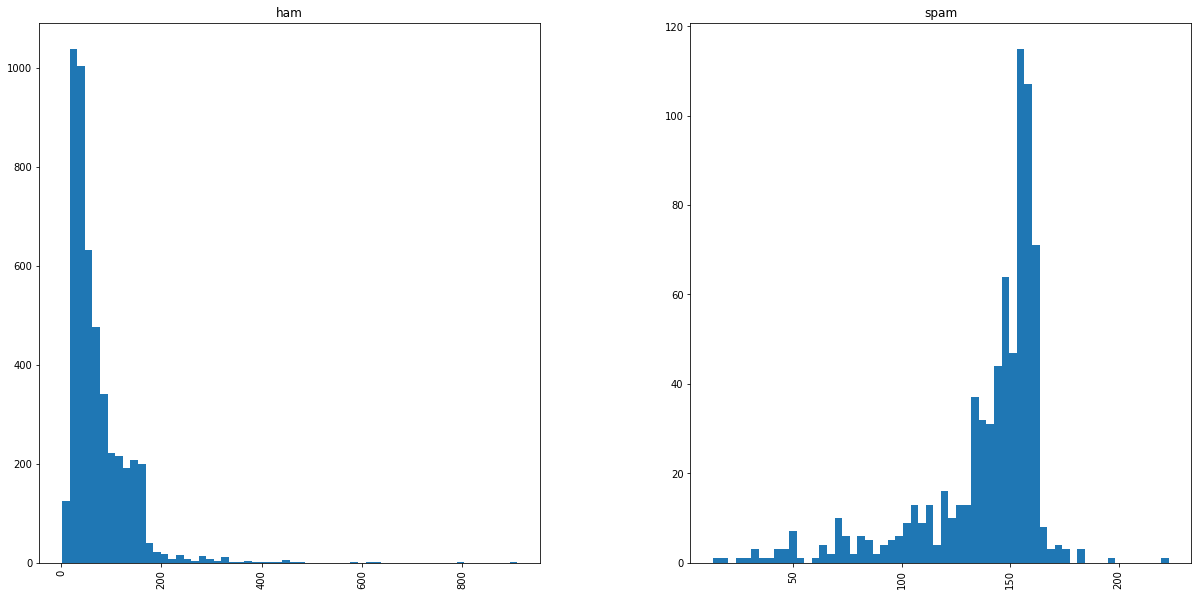

In [54]:
messages.hist(column='length',by='label',bins=60,figsize=(20,10))


In [56]:
import string
from nltk.corpus import stopwords

In [63]:
def textprocess(msg):
    remvpunc= [c for c in msg if c not in string.punctuation]
    remvpunc=''.join(remvpunc)
    return [char for char in remvpunc.split() if char.lower() not in stopwords.words('english')]

In [64]:
messages['message'].apply(textprocess)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
msgtransform= CountVectorizer(analyzer=textprocess).fit(messages['message'])

In [68]:
print(len(msgtransform.vocabulary_))

11425


In [71]:
wholetrans= msgtransform.transform(messages['message'])

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

In [78]:
tfidftransf= TfidfTransformer().fit(wholetrans) 

In [79]:
tfidfmesg= tfidftransf.transform(wholetrans)

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
model= MultinomialNB().fit(tfidfmesg,messages['label'])

In [83]:
predict=model.predict(tfidfmesg)

In [84]:
predict[2]

'spam'

In [85]:
predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [87]:
from sklearn.select_model import train_test_split

ModuleNotFoundError: No module named 'sklearn.select_model'

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
msg_train,msg_test,label_train,label_test= train_test_split(messages['message'],messages['label'],test_size=0.33)

In [91]:
from sklearn.pipeline import Pipeline

In [92]:
pipeline= Pipeline([
    ('bow',CountVectorizer(analyzer=textprocess)),('tfidf',TfidfTransformer()),('Classifier',MultinomialNB())
])

In [93]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function textprocess at 0x000001DC026B7158>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [94]:
final_prediction= pipeline.predict(msg_test)

In [95]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(label_test,final_prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1587
        spam       1.00      0.71      0.83       252

    accuracy                           0.96      1839
   macro avg       0.98      0.85      0.90      1839
weighted avg       0.96      0.96      0.96      1839

